In [29]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [30]:
tickers_1 = ['GOOGL', 'AAPL', 'AMZN', 'NVDA', 'BTC-USD', 'NDAQ', 'AKBNK.IS', 'TUPRS.IS', '^SPX']
ticker2 = ['XU100.IS']
us_stocks = ['GOOGL', 'AAPL', 'AMZN', 'NVDA']
tr_stocks = ['AKBNK.IS', 'TUPRS.IS']

In [31]:
data = yf.download(tickers_1, start='2017-01-01')
data = data.loc[:, 'Adj Close']

xu100 = yf.download(ticker2, start='2021-01-01')['Adj Close'].to_frame(name = 'XU100.IS')
xu100 = xu100.asfreq('D')
xu100.index = pd.to_datetime(xu100.index).tz_localize('UTC')

dates = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')
data = data.reindex(dates)
xu100 = xu100.reindex(dates)

data = pd.concat([data, xu100], axis=1)


[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  1 of 1 completed


In [32]:
daily_data = data
weeekly_data = data.resample('W').last()
monthly_data = data.resample('M').last()
yearly_data = data.resample('Y').last()

C:\Users\abdul\AppData\Local\Temp\ipykernel_1656\3493004640.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').last()
C:\Users\abdul\AppData\Local\Temp\ipykernel_1656\3493004640.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = data.resample('Y').last()


In [33]:
#print(weeekly_data)
#print(monthly_data)
#print(yearly_data)

In [34]:
daily_returns = daily_data.pct_change()
print(daily_returns)

                               AAPL  AKBNK.IS      AMZN   BTC-USD     GOOGL  \
2017-01-01 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2017-01-02 00:00:00+00:00       NaN       NaN       NaN  0.023464       NaN   
2017-01-03 00:00:00+00:00       NaN -0.020592       NaN  0.021620       NaN   
2017-01-04 00:00:00+00:00 -0.001119 -0.014455  0.004657  0.106233 -0.000297   
2017-01-05 00:00:00+00:00  0.005085  0.000000  0.030732 -0.122410  0.006499   
...                             ...       ...       ...       ...       ...   
2024-10-07 00:00:00+00:00 -0.022531  0.023919 -0.030615 -0.009269 -0.024422   
2024-10-08 00:00:00+00:00  0.018404  0.007188  0.010619 -0.001682  0.008590   
2024-10-09 00:00:00+00:00  0.016698  0.020517  0.013408 -0.024945 -0.015330   
2024-10-10 00:00:00+00:00 -0.002178 -0.025350  0.007993 -0.005077  0.001359   
2024-10-11 00:00:00+00:00  0.000000  0.017937  0.000000  0.013033  0.000000   

                               NDAQ      NVDA  TUPR

C:\Users\abdul\AppData\Local\Temp\ipykernel_1656\2071836889.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = daily_data.pct_change()


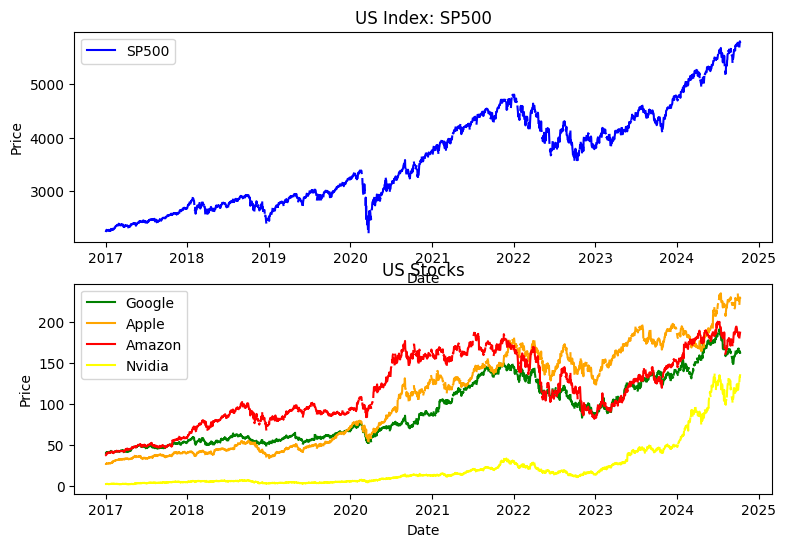

In [35]:
fig, ax = plt.subplots(2, 1, figsize=(9,6)) 
ax[0].plot(daily_data['^SPX'], label='SP500', color='blue')
ax[0].set_title('US Index: SP500')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[0].legend()

# Plot US Stocks
ax[1].plot(daily_data['GOOGL'], label='Google', color='green')
ax[1].plot(daily_data['AAPL'], label='Apple', color='orange')
ax[1].plot(daily_data['AMZN'], label='Amazon', color='red')
ax[1].plot(daily_data['NVDA'], label='Nvidia', color='yellow')
ax[1].set_title('US Stocks')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price')
ax[1].legend()

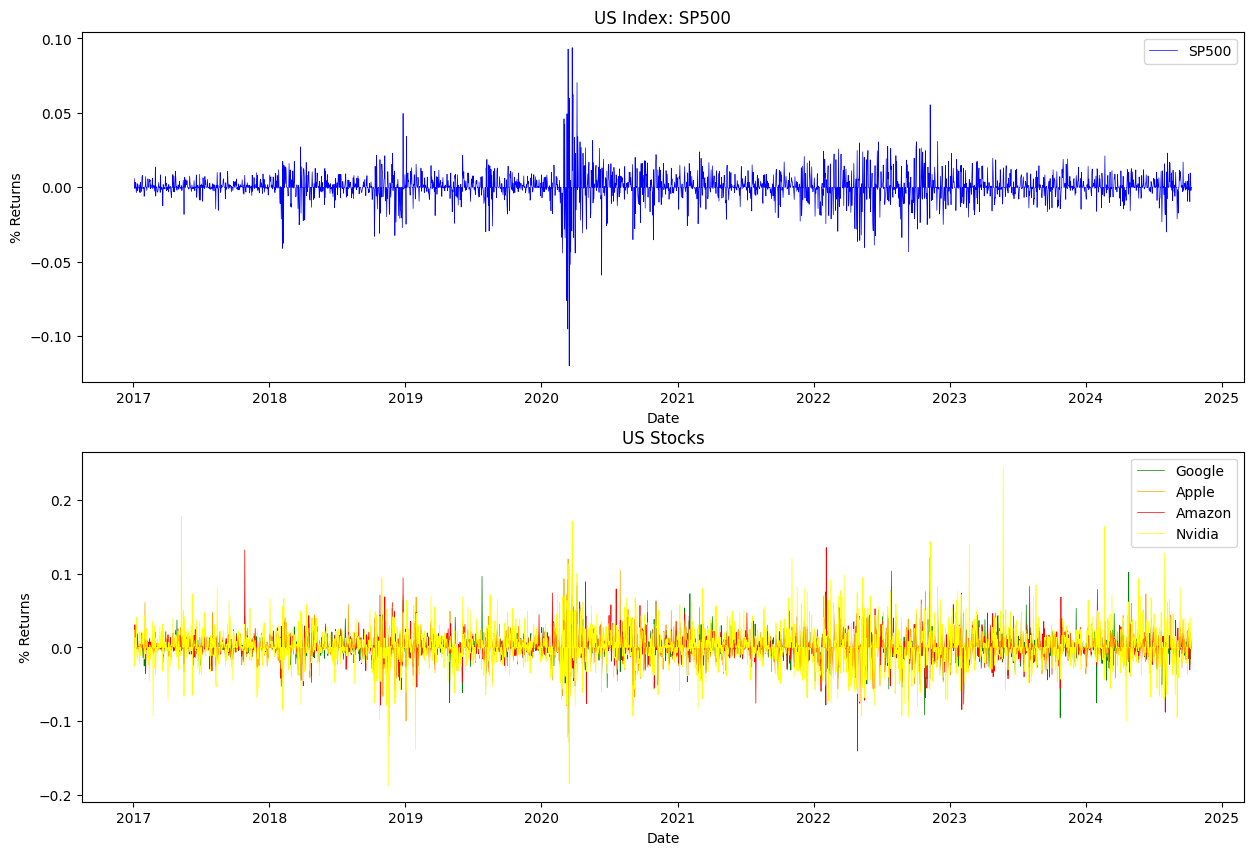

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(15,10)) 
ax[0].plot(daily_returns['^SPX'], label='SP500', linewidth=0.5, color='blue')
ax[0].set_title('US Index: SP500')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('% Returns')
ax[0].legend()

# Plot US Stocks
ax[1].plot(daily_returns['GOOGL'], label='Google', linewidth=0.5, color='green')
ax[1].plot(daily_returns['AAPL'], label='Apple', linewidth=0.5, color='orange')
ax[1].plot(daily_returns['AMZN'], label='Amazon', linewidth=0.5, color='red')
ax[1].plot(daily_returns['NVDA'], label='Nvidia', linewidth=0.5, color='yellow')
ax[1].set_title('US Stocks')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('% Returns')
ax[1].legend()

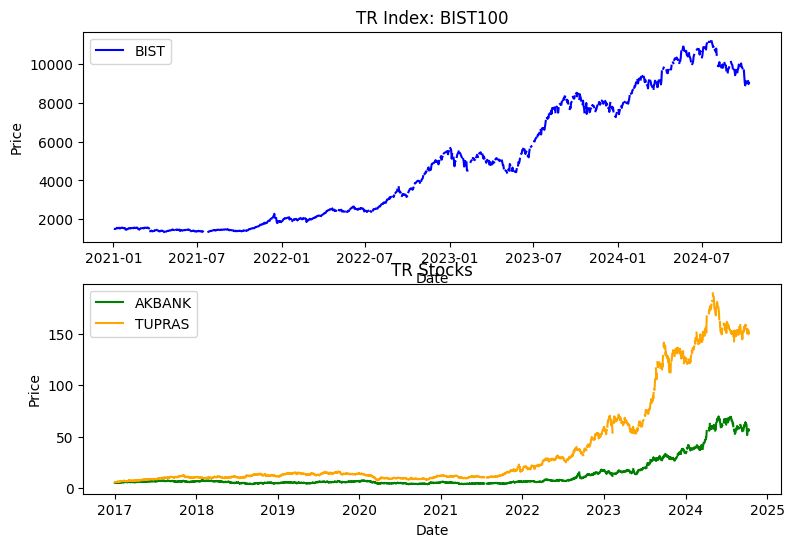

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(9,6)) 
ax[0].plot(daily_data['XU100.IS'], label='BIST', color='blue')
ax[0].set_title('TR Index: BIST100')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[0].legend()

ax[1].plot(daily_data['AKBNK.IS'], label='AKBANK', color='green')
ax[1].plot(daily_data['TUPRS.IS'], label='TUPRAS', color='orange')
ax[1].set_title('TR Stocks')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price')
ax[1].legend()

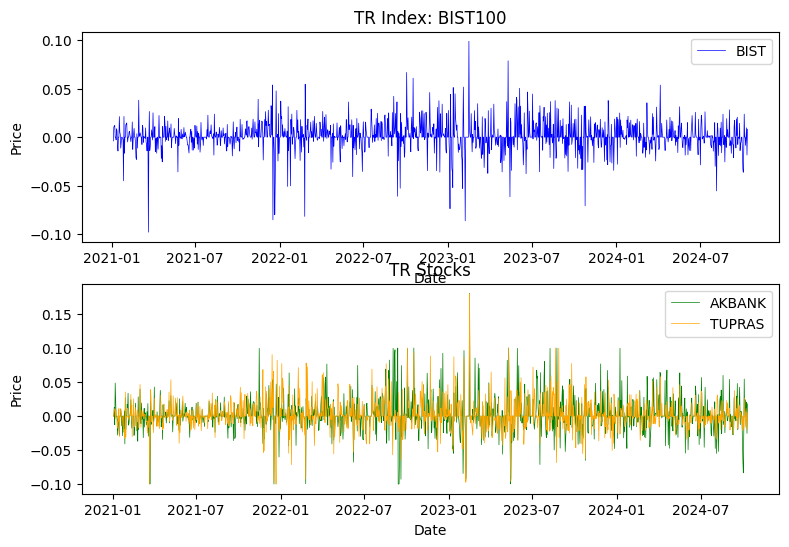

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(9,6)) 
ax[0].plot(daily_returns['XU100.IS'], label='BIST', linewidth=0.5, color='blue')
ax[0].set_title('TR Index: BIST100')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[0].legend()

ax[1].plot(daily_returns[daily_returns.index>'2021-01-01']['AKBNK.IS'], label='AKBANK', linewidth=0.5, color='green')
ax[1].plot(daily_returns[daily_returns.index>'2021-01-01']['TUPRS.IS'], label='TUPRAS', linewidth=0.5, color='orange')
ax[1].set_title('TR Stocks')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price')
ax[1].legend()

In [39]:
print('prices')
print(daily_data[['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'NVDA']].agg(['mean', 'std', 'var', 'skew']))
print(daily_data[['AKBNK.IS', 'TUPRS.IS']].agg(['mean', 'std', 'var', 'skew']))
print()
print('returns')
print(daily_returns[['AAPL', 'AMZN', 'BTC-USD', 'GOOGL', 'NVDA']].agg(['mean', 'std', 'var', 'skew']))
print(daily_returns[['AKBNK.IS', 'TUPRS.IS']].agg(['mean', 'std', 'var', 'skew']))

prices
             AAPL         AMZN       BTC-USD        GOOGL        NVDA
mean   108.048469   116.689263  2.332891e+04    92.217010   22.507426
std     59.773724    43.165081  1.982055e+04    38.755613   28.902312
var   3572.898045  1863.224195  3.928542e+08  1501.997516  835.343660
skew     0.164356    -0.001269  8.198187e-01     0.466403    2.283921
        AKBNK.IS     TUPRS.IS
mean   12.884571    37.637419
std    15.249640    47.272948
var   232.551507  2234.731638
skew    2.270892     1.707019

returns
          AAPL      AMZN   BTC-USD     GOOGL      NVDA
mean  0.000874  0.000714  0.002166  0.000608  0.001753
std   0.015454  0.017327  0.037731  0.015309  0.026476
var   0.000239  0.000300  0.001424  0.000234  0.000701
skew  0.081561  0.223600 -0.048672 -0.047048  0.339261
      AKBNK.IS  TUPRS.IS
mean  0.001093  0.001348
std   0.022218  0.019860
var   0.000494  0.000394
skew  0.530863  0.491540


In [45]:
# PART 2 QUESTION 5
y_apple = monthly_data['AAPL']
y_amazon = monthly_data['AMZN']
y_google = monthly_data['GOOGL']
y_nvidia = monthly_data['NVDA']
y_us = [y_apple, y_amazon, y_google, y_nvidia]

y_tupras = monthly_data['TUPRS.IS'][monthly_data.index>'2021-01-01'] # for turkish stocks
y_akbank = monthly_data['AKBNK.IS'][monthly_data.index>'2021-01-01'] # for turkish stocks
y_tr = [y_tupras, y_akbank]


x_bist = monthly_data['XU100.IS'][monthly_data.index>'2021-01-01'] # for turkish stocks
x_bist = sm.add_constant(x_bist)

x_nasdaq = monthly_data['NDAQ']
x_nasdaq = sm.add_constant(x_nasdaq)


for y in y_us:    
    model = sm.OLS(y, x_nasdaq)
    results = model.fit()
    print(y.name, results.params['NDAQ'])

for y in y_tr:
    model = sm.OLS(y, x_bist)
    results = model.fit()
    print(y.name, results.params['XU100.IS'])
    

AAPL 3.680873311884075
AMZN 2.241620553713996
GOOGL 2.320283809667932
NVDA 1.3613992938502038
TUPRS.IS 0.017323567328531346
AKBNK.IS 0.005886278814457538


In [ ]:
[monthly_data.index>'2021-01-01'] # for turkish stocks